# 離散一様分布
確率変数Xがn個の値（ x1,x2,x3,…,xn ）を同じ確率でとりうるとき、Xは離散一様分布に従う。

f(xi)=1/n

## Q サイコロを降ったときに出てくる目の平均と分散をもとめよ

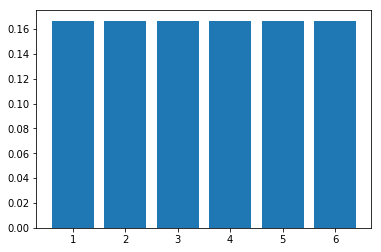

In [2]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# もしPython2をつかっているなら。
from __future__ import division
%matplotlib inline

# サイコロの取り得る値
roll_options = [1,2,3,4,5,6]

# 確率の総和は1です。
tprob = 1

# 公正なサイコロだったら、どの目も同じ確率で出ます。
prob_roll = tprob / len(roll_options)

# 描画してみます。
uni_plot = plt.bar(roll_options, [prob_roll] * 6)

In [3]:
from scipy.stats import randint

# 最大の手前までなので、7です。
low,high = 1,7

# このコードで、離散一様分布の平均と分散を計算できます。
mean,var = randint.stats(low,high)
print('平均= {} 分散={}'.format(mean, var))

平均= 3.5 分散=2.9166666666666665


# 連続一様分布
離散一様分布のうち、一定以上の結果が起こる確率

変数
- 可能性のある下限
- 可能性のある上限
- 求めたい範囲の最小の値


## Q　客が２５分以上タクシーに乗車する確率はどれくらいか？
ニューヨーク市での平均的なタクシーの乗車時間は22分くらいであることが知られています。
調査の結果、この乗車時間が、19分から27分の間の連続的な一様分布に従うことが分かったとします。
客が25分以上タクシーに乗車する確率はどれくらいでしょう？

In [8]:
# 乗車時間の下限
min_time = 19

# 上限
max_time = 27

# 乗車時間が25分までに収まる確率は、
f25 = (25-19)/(max_time-min_time)

# 少なくても25分以上乗る確率は、
ans = 1-f25

print('乗車時間が少なくとも25分かかる確率は{}%'.format(100*ans))

乗車時間が少なくとも25分かかる確率は25.0%


# 二項分布
平均成功率OO％の人が、平均以上の一定の成果を出す確率はどれくらいか？<br>
（確率低くても数打てるほうが良いのかどうか判断）

変数
- 平均成功率
- 何回繰り返すのか
- 達成したい目標（点数）

## Q 1試合で6点ゴールを決める確率が高いのは、プレイヤーAかプレイヤーBか？
プレイヤーAとプレイヤーBの2人が、バスケットボールをします。<br>
Aは1ゲームで平均11回シュートをして、平均的な成功率は72％です。<br>
一方、Bは15回シュートをしますが、平均的に48%しか決まりません。

In [10]:
# 成功率
p_A = .72
p_B = .48

# シュートの数
n_A = 11
n_B = 15

# 成功数
k = 6

# 組み合わせを求めるため
import scipy.misc as sc

comb_A = sc.comb(n_A,k)
comb_B = sc.comb(n_B,k)

# これらを掛け合わせれば、確率がでます。
answer_A = comb_A * (p_A**k) * ((1-p_A)**(n_A-k))
answer_B = comb_B * (p_B**k) * ((1-p_B)**(n_B-k))
# パーセントで結果を格納しておきます。
answer_A = 100*answer_A
answer_B = 100 * answer_B

print('プレイヤーAが平均的な試合で6回シュートを決める確率は{:0.2f}% '.format(answer_A))
print('')
print('プレイヤーBが平均的な試合で6回シュートを決める確率は{:0.2f}%'.format(answer_B))

プレイヤーAが平均的な試合で6回シュートを決める確率は11.08% 

プレイヤーBが平均的な試合で6回シュートを決める確率は17.02%


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  app.launch_new_instance()


In [19]:
# ６回以上決める確率は？
answers_A = []
answers_B = []

for k in range(1,6):
    comb_A = sc.comb(n_A,k)
    comb_B = sc.comb(n_B, k)
    
    answer_A = comb_A * (p_A**k) * ((1-p_A)**(n_A-k))
    answer_B = comb_B * (p_B**k) * ((1-p_B)**(n_B-k))
    
    answer_A = 100*answer_A
    answer_B = 100 * answer_B
    
    answers_A.append(answer_A)
    answers_B.append(answer_B)
    

answer_A = 100 - sum(answers_A)
answer_B = 100 - sum(answers_B)


print('プレイヤーAが平均的な試合で6回以上シュートを決める確率は{:0.2f}% '.format(answer_A))
print('')
print('プレイヤーBが平均的な試合で6回以上シュートを決める確率は{:0.2f}%'.format(answer_B))


プレイヤーAが平均的な試合で6回以上シュートを決める確率は94.23% 

プレイヤーBが平均的な試合で6回以上シュートを決める確率は80.96%


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  import sys


In [20]:
# 平均値です。
mu_A = n_A *p_A
mu_B = n_B *p_B

# 標準偏差を計算しましょう。
sigma_A = ( n_A *p_A*(1-p_A) )**0.5
sigma_B = ( n_B *p_B*(1-p_B) )**0.5

print('プレイヤーAは1試合で、平均{:0.1f}回±{:0.1f}シュートを決めます。'.format(mu_A,sigma_A))
print('\n')
print('プレイヤーBは1試合で、平均{:0.1f}回±{:0.1f}シュートを決めます。'.format(mu_B,sigma_B))

プレイヤーAは1試合で、平均7.9回±1.5シュートを決めます。


プレイヤーBは1試合で、平均7.2回±1.9シュートを決めます。


# ポアソン分布
二項分布と似ている（同じ確率の同じ作業をずっと繰り返すわけではない）<br>
平均的な期待値をもとに、それ以上やそれ以下の結果が起きる確率を予測

変数
- 期待値（λ）
- 予測したい値


## Q今日お昼のマックに7人または11人客が来る確率はどれくらいか？
マクドナルドのランチのピークは、12:30から1:00の間です。<br>
これまでの経験から、平均で10人のお客さんが、この時間帯に来店することが分かっています。<br>
それでは、ちょうど7人のお客さんが来店する確率はどれくらいでしょうか？<br>
 また、10人より多いお客さんが来る確率はどれくらいでしょうか？

In [22]:
# 　期待値λをセット
lamb = 10

# ちょうど7人来る確率を計算したいので、k=7です。
k=7

# 標準mathモジュールから、必要なモノをインポート
from math import exp
from math import factorial

# 確率質量関数をつかって確率を計算します。
prob = (lamb**k)*exp(-lamb)/factorial(k)

print(' 昼のピーク時にお客さんが7人である確率は、{:0.2f}%です。'.format(100*prob))

 昼のピーク時にお客さんが7人である確率は、9.01%です。


In [24]:
# 11人以上来る確率を予測
from scipy.stats import poisson

# お客さんが10人までの確率を計算するので、k = 10です。平均値もおなじく10
k,mu = 10,10

# お客さんが10人までの確率を次のコードで計算できます。
prob_up_to_ten = poisson.cdf(k,mu)

#答え
prob_more_than_ten = 1 - prob_up_to_ten

print('10人より多くのお客さんが来る確率は、{:0.2f}%です。'.format(100*prob_more_than_ten))

10人より多くのお客さんが来る確率は、41.70%です。


# 正規分布
そのまんま

変数
- 平均
- 標準偏差
- サンプルの個数

## Q平均0,標準偏差０．５でランダムな数値を生成するモデルを1000回動かすと、どのようなグラフになるか？

(array([ 1.,  1.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  5.,  3.,  3.,  2.,
         3.,  6.,  4.,  6.,  3.,  7.,  5.,  4.,  4.,  9.,  4., 11., 16.,
         8.,  4.,  9., 14., 15., 11., 12., 17., 13., 14., 21., 16., 12.,
        18., 17., 14., 19., 12., 24., 27., 24., 24., 22., 23., 23., 29.,
        28., 20., 29., 23., 22., 21.,  7., 23., 22., 24., 24., 11., 16.,
        13., 15.,  8., 17., 15., 13.,  8.,  6., 12.,  9.,  4.,  5.,  6.,
         4.,  7.,  5.,  4.,  3.,  4.,  4.,  2.,  4.,  0.,  5.,  1.,  1.,
         2.,  3.,  2.,  1.,  0.,  1.,  1.,  1.,  2.]),
 array([-0.2801558 , -0.27448373, -0.26881167, -0.2631396 , -0.25746754,
        -0.25179547, -0.24612341, -0.24045135, -0.23477928, -0.22910722,
        -0.22343515, -0.21776309, -0.21209102, -0.20641896, -0.20074689,
        -0.19507483, -0.18940276, -0.1837307 , -0.17805863, -0.17238657,
        -0.1667145 , -0.16104244, -0.15537037, -0.14969831, -0.14402624,
        -0.13835418, -0.13268212, -0.12701005, -0.12133799, -0.115665

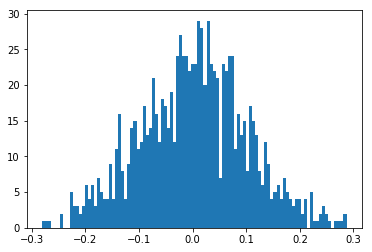

In [31]:
import numpy as np

# 平均と標準偏差の値を入力
mu,sigma = 0,0.1

# 正規分布に従う乱数を1000個生成します。
norm_set = np.random.normal(mu,sigma,1000)

# seabornを使ってプロットしてみましょう。
import seaborn as sns

plt.hist(norm_set,bins=100)

#  ベイズの定理
Bが起こったという条件のもとで、Aが起こる確率を求める


変数
- Aが起こる確率 

- Aが起きたときに、Bが起きる確率



## Q クッキー問題

ボールが2つあって、それぞれにクッキーが40個入っています。<br>

- ボール1には、バニラクッキーが30個、チョコレートクッキーが10個
- ボール2には、バニラとチョコレートが20個ずつ
<br>

目を閉じて、どちらかのボールから、クッキーを1つ取り出しました。このクッキーがバニラだったとき、ボール1を選んだ確率は？

In [34]:
# ボールAを選ぶ確率
x_a = 1/2

# ボールAを選んだときに、バニラクッキーを選ぶ確率
x_b = 3/4

#バニラクッキーを選ぶ確率
x_c = 5/8

answer = x_a * x_b / x_c

print("クッキーがバニラだったとき、ボール1を選んだ確率は{}%".format(answer * 100) )

クッキーがバニラだったとき、ボール1を選んだ確率は60.0%


## Q Irisをベイズの定理を使って分類せよ

X（特徴量ら）からY(特定のクラス)に属している確率を直接算出できる。

In [37]:
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split

# Gaussian Naive Bayes のためのコード
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

model = GaussianNB()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

model.fit(X_train,Y_train)
predicted = model.predict(X_test)

expected = Y_test

print(metrics.accuracy_score(expected, predicted))


1.0
